In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sns.set_style('darkgrid')
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)  # Ensures that the display width isn't restricted
pd.set_option('display.max_rows', None)

In [3]:
df = pd.read_csv('Network_anomaly_data.csv')
df['is_attack'] = df['attack'].apply(lambda x: 'normal' if x=='normal' else 'attack')
df.head()

,duration,protocoltype,service,flag,srcbytes,dstbytes,land,wrongfragment,urgent,hot,numfailedlogins,loggedin,numcompromised,rootshell,suattempted,numroot,numfilecreations,numshells,numaccessfiles,numoutboundcmds,ishostlogin,isguestlogin,count,srvcount,serrorrate,srvserrorrate,rerrorrate,srvrerrorrate,samesrvrate,diffsrvrate,srvdiffhostrate,dsthostcount,dsthostsrvcount,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,attack,lastflag,is_attack
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20,normal
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15,normal
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19,attack
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21,normal
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21,normal


In [4]:
# land, wrongfragment,urgent, numfailedlogins,loggedin,rootshell,suattempted,numshells,ishostlogin,isguestlogin
df['land'] = df['land'].astype('category')
df['wrongfragment'] = df['wrongfragment'].astype('category')
df['urgent'] = df['urgent'].astype('category')
df['numfailedlogins'] = df['numfailedlogins'].astype('category')
df['loggedin'] = df['loggedin'].astype('category')
df['rootshell'] = df['rootshell'].astype('category')
df['suattempted'] = df['suattempted'].astype('category')
df['numshells'] = df['numshells'].astype('category')
df['ishostlogin'] = df['ishostlogin'].astype('category')
df['isguestlogin'] = df['isguestlogin'].astype('category')

In [5]:
scan = set(['ipsweep', 'portsweep', 'nmap', 'satan'])
dos = set(['neptune', 'smurf', 'pod', 'teardrop', 'land'])
access = set(['guess_passwd', 'ftp_write', 'imap', 'phf', 'multihop', 'warezclient', 'warezmaster'])
exploit = set(['buffer_overflow', 'loadmodule', 'rootkit', 'perl'])
backdoor = set(['back','spy'])

df['attack_category'] = None

for i in range(len(df)):
  attk = df.loc[i,'attack']
  if attk in scan:
    df.loc[i,'attack_category'] = 'scan'
  elif attk in dos:
    df.loc[i,'attack_category'] = 'dos'
  elif attk in access:
    df.loc[i,'attack_category'] = 'access'
  elif attk in exploit:
    df.loc[i,'attack_category'] = 'exploit'
  elif attk in backdoor:
    df.loc[i,'attack_category'] = 'backdoor'
  else:
    df.loc[i,'attack_category'] = 'normal'

In [6]:
df['logsrcbytes'] = np.log10(df['srcbytes']+1)
df['logdstbytes'] = np.log10(df['dstbytes']+1)
df['logduration'] = np.log10(df['duration']+1)
df['lognumcompromised'] = np.log10(df['numcompromised']+1)

<Axes: xlabel='logdstbytes'>

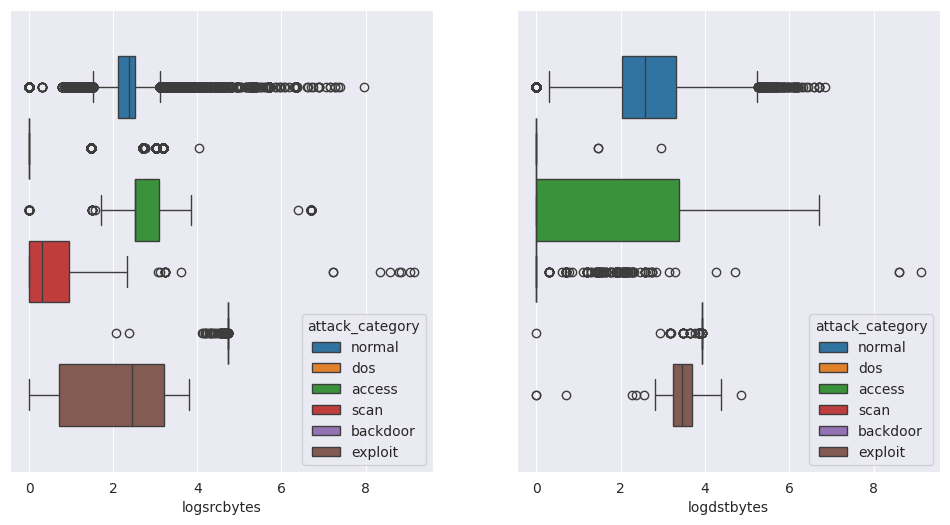

In [7]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.boxplot(data=df,x='logsrcbytes',hue='attack_category')
plt.subplot(1,2,2)
sns.boxplot(data=df,x='logdstbytes',hue='attack_category')

In [8]:
pd.DataFrame(df['duration'].describe()).T

,count,mean,std,min,25%,50%,75%,max
duration,125973.0,287.14465,2604.51531,0.0,0.0,0.0,0.0,42908.0


In [9]:
#calculating 0-100th percentile to find a the correct percentile value for removal of outliers
for i in range(0,110,10):
    print("{} percentile value is {}".format(i,np.percentile(df['duration'].dropna(),i)))

0 percentile value is 0.0
10 percentile value is 0.0
20 percentile value is 0.0
30 percentile value is 0.0
40 percentile value is 0.0
50 percentile value is 0.0
60 percentile value is 0.0
70 percentile value is 0.0
80 percentile value is 0.0
90 percentile value is 0.0
100 percentile value is 42908.0


In [10]:
for i in range(90,101,1):
    print("{} percentile value is {}".format(i,np.percentile(df['duration'].dropna(),i)))

90 percentile value is 0.0
91 percentile value is 0.0
92 percentile value is 0.0
93 percentile value is 1.0
94 percentile value is 2.0
95 percentile value is 4.0
96 percentile value is 15.0
97 percentile value is 31.0
98 percentile value is 2050.679999999993
99 percentile value is 9590.559999999998
100 percentile value is 42908.0


<Axes: xlabel='logduration'>

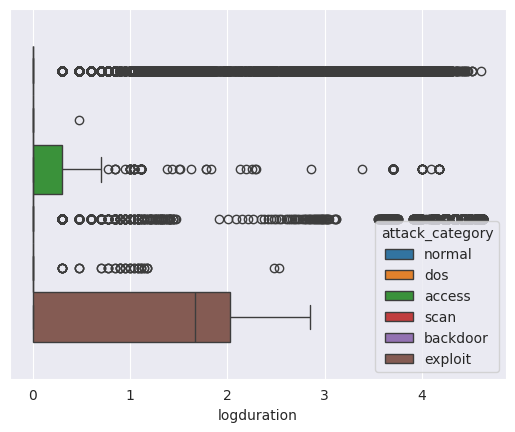

In [11]:
sns.boxplot(data=df,x='logduration',hue='attack_category')

In [12]:
df[df['duration']>1000]['is_attack'].value_counts()

,count
is_attack,
normal,1684
attack,1089


In [13]:
long = df[df['duration'] > 1000]
long['attack_category'].value_counts()

,count
attack_category,
normal,1684
scan,997
access,92


In [14]:
pd.DataFrame(df['numcompromised'].describe()).T

,count,mean,std,min,25%,50%,75%,max
numcompromised,125973.0,0.27925,23.942042,0.0,0.0,0.0,0.0,7479.0


In [15]:
#calculating 0-100th percentile to find a the correct percentile value for removal of outliers
for i in range(0,110,10):
    print("{} percentile value is {}".format(i,np.percentile(df['numcompromised'].dropna(),i)))

0 percentile value is 0.0
10 percentile value is 0.0
20 percentile value is 0.0
30 percentile value is 0.0
40 percentile value is 0.0
50 percentile value is 0.0
60 percentile value is 0.0
70 percentile value is 0.0
80 percentile value is 0.0
90 percentile value is 0.0
100 percentile value is 7479.0


In [16]:
for i in range(90,101,1):
    print("{} percentile value is {}".format(i,np.percentile(df['numcompromised'].dropna(),i)))

90 percentile value is 0.0
91 percentile value is 0.0
92 percentile value is 0.0
93 percentile value is 0.0
94 percentile value is 0.0
95 percentile value is 0.0
96 percentile value is 0.0
97 percentile value is 0.0
98 percentile value is 0.0
99 percentile value is 1.0
100 percentile value is 7479.0


<Axes: xlabel='lognumcompromised'>

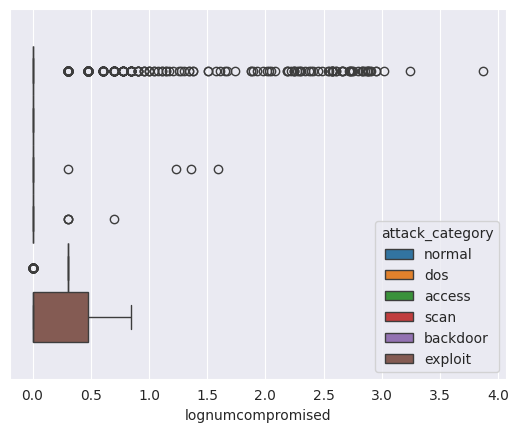

In [17]:
sns.boxplot(data=df,x='lognumcompromised',hue='attack_category')

In [18]:
pd.DataFrame(df['hot'].describe()).T

,count,mean,std,min,25%,50%,75%,max
hot,125973.0,0.204409,2.149968,0.0,0.0,0.0,0.0,77.0


In [19]:
for i in range(0,110,10):
    print("{} percentile value is {}".format(i,np.percentile(df['hot'].dropna(),i)))

0 percentile value is 0.0
10 percentile value is 0.0
20 percentile value is 0.0
30 percentile value is 0.0
40 percentile value is 0.0
50 percentile value is 0.0
60 percentile value is 0.0
70 percentile value is 0.0
80 percentile value is 0.0
90 percentile value is 0.0
100 percentile value is 77.0


In [20]:
for i in range(90,101,1):
    print("{} percentile value is {}".format(i,np.percentile(df['hot'].dropna(),i)))

90 percentile value is 0.0
91 percentile value is 0.0
92 percentile value is 0.0
93 percentile value is 0.0
94 percentile value is 0.0
95 percentile value is 0.0
96 percentile value is 0.0
97 percentile value is 0.0
98 percentile value is 1.0
99 percentile value is 3.0
100 percentile value is 77.0


<Axes: xlabel='hot'>

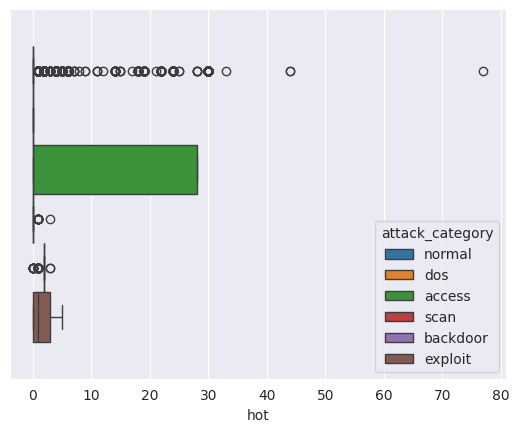

In [21]:
sns.boxplot(data=df,x='hot',hue='attack_category')

In [22]:
pd.DataFrame(df['count'].describe()).T

,count,mean,std,min,25%,50%,75%,max
count,125973.0,84.107555,114.508607,0.0,2.0,14.0,143.0,511.0


In [23]:
for i in range(0,110,10):
    print("{} percentile value is {}".format(i,np.percentile(df['count'].dropna(),i)))

0 percentile value is 0.0
10 percentile value is 1.0
20 percentile value is 1.0
30 percentile value is 3.0
40 percentile value is 7.0
50 percentile value is 14.0
60 percentile value is 47.0
70 percentile value is 122.0
80 percentile value is 195.0
90 percentile value is 256.0
100 percentile value is 511.0


In [24]:
for i in range(90,101,1):
    print("{} percentile value is {}".format(i,np.percentile(df['count'].dropna(),i)))

90 percentile value is 256.0
91 percentile value is 262.0
92 percentile value is 268.0
93 percentile value is 273.0
94 percentile value is 279.0
95 percentile value is 286.0
96 percentile value is 293.0
97 percentile value is 301.0
98 percentile value is 445.0
99 percentile value is 511.0
100 percentile value is 511.0


(0.0, 100.0)

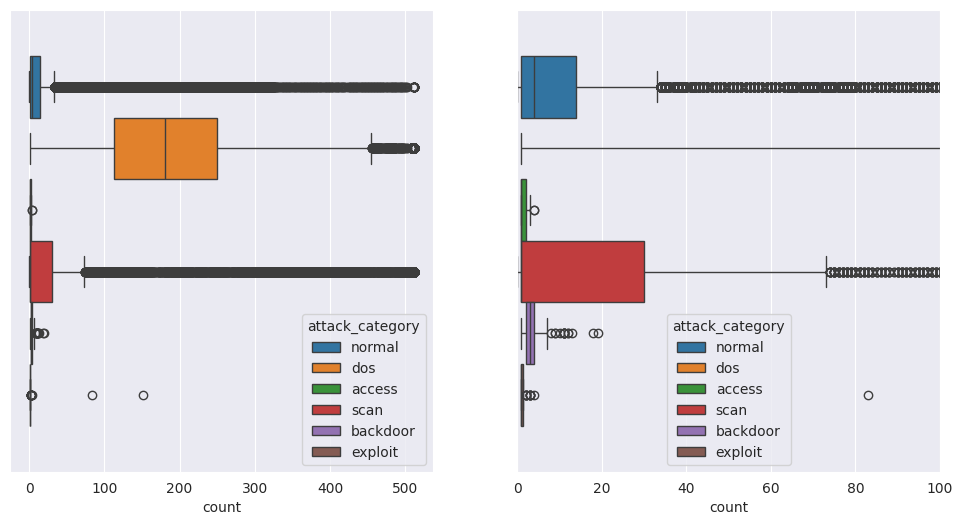

In [25]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.boxplot(data=df,x='count',hue='attack_category')
plt.subplot(1,2,2)
sns.boxplot(data=df,x='count',hue='attack_category')
plt.xlim(0,100)

In [26]:
df[df['count'] < 100]['attack_category'].value_counts()

,count
attack_category,
normal,62365
scan,9341
dos,8195
access,993
backdoor,958
exploit,51


In [27]:
df[df['count'] > 100]['attack_category'].value_counts(normalize=True)

,proportion
attack_category,
dos,0.834380
normal,0.113046
scan,0.052551
exploit,0.000023


In [28]:
pd.DataFrame(df['srvcount'].describe()).T

,count,mean,std,min,25%,50%,75%,max
srvcount,125973.0,27.737888,72.63584,0.0,2.0,8.0,18.0,511.0


In [29]:
for i in range(0,110,10):
    print("{} percentile value is {}".format(i,np.percentile(df['srvcount'].dropna(),i)))

0 percentile value is 0.0
10 percentile value is 1.0
20 percentile value is 1.0
30 percentile value is 2.0
40 percentile value is 5.0
50 percentile value is 8.0
60 percentile value is 11.0
70 percentile value is 15.0
80 percentile value is 20.0
90 percentile value is 40.0
100 percentile value is 511.0


In [30]:
for i in range(90,101,1):
    print("{} percentile value is {}".format(i,np.percentile(df['srvcount'].dropna(),i)))

90 percentile value is 40.0
91 percentile value is 47.0
92 percentile value is 65.0
93 percentile value is 114.0
94 percentile value is 146.0
95 percentile value is 158.0
96 percentile value is 189.0
97 percentile value is 227.0
98 percentile value is 286.0
99 percentile value is 492.0
100 percentile value is 511.0


(0.0, 100.0)

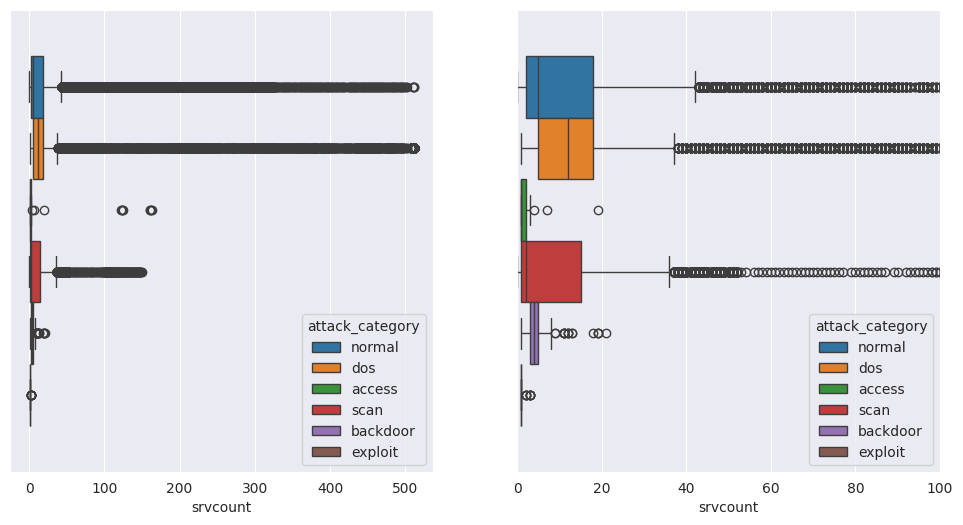

In [31]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.boxplot(data=df,x='srvcount',hue='attack_category')
plt.subplot(1,2,2)
sns.boxplot(data=df,x='srvcount',hue='attack_category')
plt.xlim(0,100)

In [32]:
pd.DataFrame(df['dsthostcount'].describe()).T

,count,mean,std,min,25%,50%,75%,max
dsthostcount,125973.0,182.148945,99.206213,0.0,82.0,255.0,255.0,255.0


In [33]:
for i in range(0,110,10):
    print("{} percentile value is {}".format(i,np.percentile(df['dsthostcount'].dropna(),i)))

0 percentile value is 0.0
10 percentile value is 11.0
20 percentile value is 50.0
30 percentile value is 123.0
40 percentile value is 237.0
50 percentile value is 255.0
60 percentile value is 255.0
70 percentile value is 255.0
80 percentile value is 255.0
90 percentile value is 255.0
100 percentile value is 255.0


<Axes: xlabel='dsthostcount'>

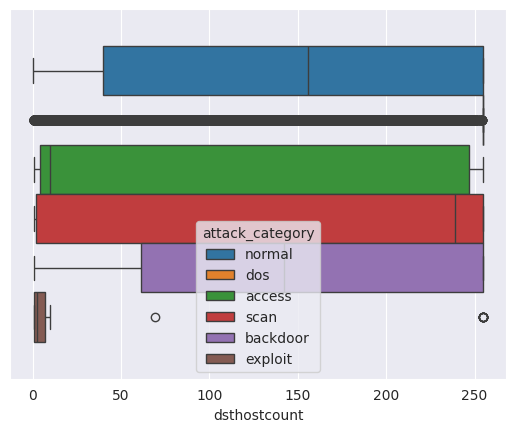

In [34]:
sns.boxplot(data=df,x='dsthostcount',hue='attack_category')

In [35]:
pd.DataFrame(df['dsthostsrvcount'].describe()).T

,count,mean,std,min,25%,50%,75%,max
dsthostsrvcount,125973.0,115.653005,110.702741,0.0,10.0,63.0,255.0,255.0


In [36]:
for i in range(0,110,10):
    print("{} percentile value is {}".format(i,np.percentile(df['dsthostsrvcount'].dropna(),i)))

0 percentile value is 0.0
10 percentile value is 2.0
20 percentile value is 7.0
30 percentile value is 14.0
40 percentile value is 20.0
50 percentile value is 63.0
60 percentile value is 157.0
70 percentile value is 254.0
80 percentile value is 255.0
90 percentile value is 255.0
100 percentile value is 255.0


<Axes: xlabel='dsthostsrvcount'>

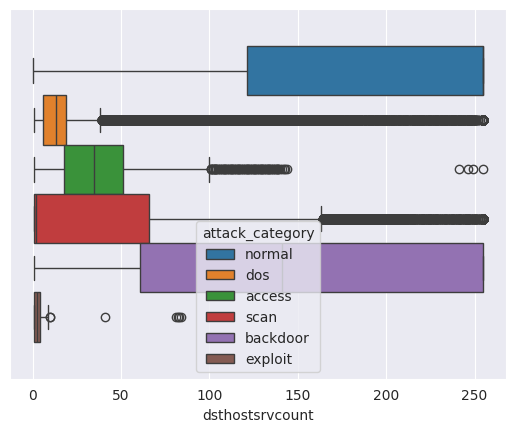

In [37]:
sns.boxplot(data=df,x='dsthostsrvcount',hue='attack_category')

In [38]:
df[df['dsthostsrvcount'] > 100]

Output hidden; open in https://colab.research.google.com to view.

In [39]:
# Host count of flags
df['dsthostserror'] = df['dsthostcount']*df['dsthostserrorrate']
df['dsthostrerror'] = df['dsthostcount']*df['dsthostrerrorrate']

# Host srv count of flags
df['dsthostsrvserror'] = df['dsthostsrvcount']*df['dsthostsrvrerrorrate']
df['dsthostsrvrerror'] = df['dsthostsrvcount']*df['dsthostsrvserrorrate']

df['dsthostsamesrv'] = df['dsthostsrvcount']*df['dsthostsamesrvrate']
df['dsthostdiffsrv'] = df['dsthostsrvcount']*df['dsthostdiffsrvrate']

# Host count of flags
df['serror'] = df['count']*df['serrorrate']
df['rerror'] = df['count']*df['rerrorrate']

# Host srv count of flags
df['srvserror'] = df['srvcount']*df['srvrerrorrate']
df['srvrerror'] = df['srvcount']*df['srvserrorrate']

df['samesrv'] = df['count']*df['samesrvrate']
df['diffsrv'] = df['count']*df['diffsrvrate']

In [40]:
# plt.figure(figsize=(11,11))
# plt.subplot(2,2,1)
# sns.stripplot(data=df,x='protocoltype',y='duration', hue='attack_category', jitter=True, dodge=True)
# for i in range(len(df['protocoltype'].unique())):
#     plt.axvline(x=i - 0.5, color='gray', linestyle='--', linewidth=1)

# plt.subplot(2,2,2)
# sns.stripplot(data=df,x='flag',y='duration', hue='attack_category', jitter=True, dodge=True)
# for i in range(len(df['flag'].unique())):
#     plt.axvline(x=i - 0.5, color='gray', linestyle='--', linewidth=1)

# plt.subplot(2,2,3)
# sns.stripplot(data=df,x='loggedin',y='duration', hue='attack_category', jitter=True, dodge=True)
# for i in range(len(df['loggedin'].unique())):
#     plt.axvline(x=i - 0.5, color='gray', linestyle='--', linewidth=1)

# plt.subplot(2,2,4)
# sns.stripplot(data=df,x='isguestlogin',y='duration', hue='attack_category', jitter=True, dodge=True)
# for i in range(len(df['isguestlogin'].unique())):
#     plt.axvline(x=i - 0.5, color='gray', linestyle='--', linewidth=1)